In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [125]:
data = pd.read_csv('/content/Stock Exchange KSE 100(Pakistan).csv')
data.set_index('Date')
data=data.reset_index(drop='True')
data.head(5)

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [126]:
def remove_punc(x):
    n = ""
    for i in x:
        if i !=",":
            n+=i
    return n
for col in data.columns[1:]:
    data[col] = data[col].apply(lambda x: float(remove_punc(x)))

In [127]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Change    float64
Volume    float64
dtype: object

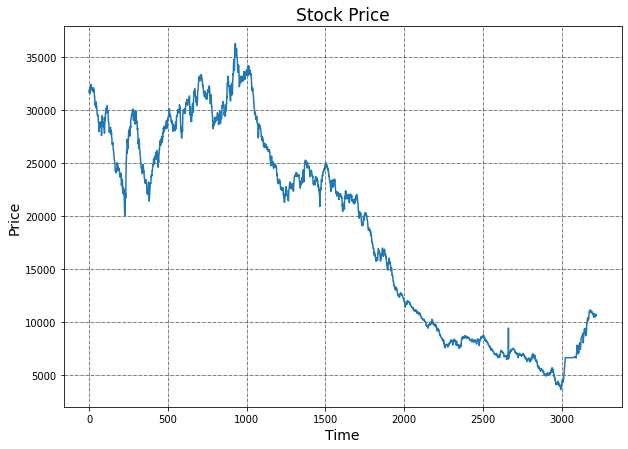

In [128]:
data['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [129]:
dates=data['Date']
data = data.drop(columns='Date')

In [130]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close'], axis=1)
    target = df_Stock['Close']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [131]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(data)

Historical Stock Data length is -  3221
Training Set length -  2834
Validation Set length -  322
Test Set length -  64
(2834, 5) (322, 5) (65, 5)
(2834,) (322,) (65,)


In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [133]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [134]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred

,index,Actual,Predicted
0,2834,6395.22,6362.495580
1,2835,6424.24,6435.369739
2,2836,6412.56,6444.657888
3,2837,6370.49,6369.996722
4,2838,6430.72,6413.985096
...,...,...,...
317,3151,8946.16,8944.591788
318,3152,8804.22,8795.826178
319,3153,8699.61,8695.551625
320,3154,8758.19,8629.615291


<Axes: >

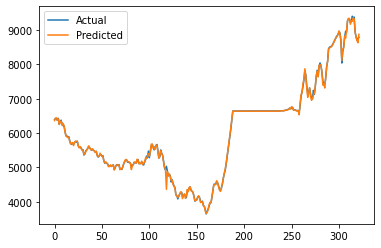

In [135]:
df_pred[['Actual', 'Predicted']].plot()


In [137]:
pickle.dump(lr,open("model.pkl" ,"wb"))